In [2]:
# 导入你所需要的库
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
user_profile = pd.read_csv("用户基本信息.csv")
user_profile.head()

,userid,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
0,234,0,5,2,5,NaN,3,0,3.0
1,523,5,2,2,2,1.0,3,1,2.0
2,612,0,8,1,2,2.0,3,0,NaN
3,1670,0,4,2,4,NaN,1,0,NaN
4,2545,0,10,1,4,NaN,3,0,NaN


## 数据说明

- userid  用户编号
- cms_segid 微信ID
- cms_group_id  微信群ID
- final_gender_code 性别  1是男2是女
- age_level  年龄层次
- pvalue_level 消费档次
- shopping_level 购物档次
- occupation   是不是大学生
- new_user_class_level  城市层级


In [4]:
user_profile.shape

(1061768, 9)

In [9]:
chunksize=10000

user_info_chuck = pd.read_csv("用户基本信息.csv", chunksize=chunksize)
user_info = pd.DataFrame()
start_index = 0
for u in user_info_chuck:
    print("正在处理第"+str(start_index) +"行数据")
    user_info = user_info.append(u.loc[start_index], ignore_index=True)
    start_index += chunksize
print("数据处理完成")

正在处理第0行数据
正在处理第10000行数据
正在处理第20000行数据
正在处理第30000行数据
正在处理第40000行数据
正在处理第50000行数据
正在处理第60000行数据
正在处理第70000行数据
正在处理第80000行数据
正在处理第90000行数据
正在处理第100000行数据
正在处理第110000行数据
正在处理第120000行数据
正在处理第130000行数据
正在处理第140000行数据
正在处理第150000行数据
正在处理第160000行数据
正在处理第170000行数据
正在处理第180000行数据
正在处理第190000行数据
正在处理第200000行数据
正在处理第210000行数据
正在处理第220000行数据
正在处理第230000行数据
正在处理第240000行数据
正在处理第250000行数据
正在处理第260000行数据
正在处理第270000行数据
正在处理第280000行数据
正在处理第290000行数据
正在处理第300000行数据
正在处理第310000行数据
正在处理第320000行数据
正在处理第330000行数据
正在处理第340000行数据
正在处理第350000行数据
正在处理第360000行数据
正在处理第370000行数据
正在处理第380000行数据
正在处理第390000行数据
正在处理第400000行数据
正在处理第410000行数据
正在处理第420000行数据
正在处理第430000行数据
正在处理第440000行数据
正在处理第450000行数据
正在处理第460000行数据
正在处理第470000行数据
正在处理第480000行数据
正在处理第490000行数据
正在处理第500000行数据
正在处理第510000行数据
正在处理第520000行数据
正在处理第530000行数据
正在处理第540000行数据
正在处理第550000行数据
正在处理第560000行数据
正在处理第570000行数据
正在处理第580000行数据
正在处理第590000行数据
正在处理第600000行数据
正在处理第610000行数据
正在处理第620000行数据
正在处理第630000行数据
正在处理第640000行数据
正在处理第650000行数据
正在处理第660000行数据
正在处理第6700

In [10]:
user_info

,age_level,cms_group_id,cms_segid,final_gender_code,new_user_class_level,occupation,pvalue_level,shopping_level,userid
0,5.0,5.0,0.0,2.0,3.0,0.0,NaN,3.0,234.0
1,2.0,8.0,55.0,1.0,1.0,0.0,2.0,2.0,685416.0
2,4.0,4.0,0.0,2.0,1.0,0.0,NaN,3.0,234613.0
3,3.0,3.0,0.0,2.0,NaN,0.0,NaN,1.0,945968.0
4,4.0,4.0,0.0,2.0,NaN,0.0,1.0,3.0,416289.0
...,...,...,...,...,...,...,...,...,...
102,5.0,5.0,0.0,2.0,NaN,0.0,2.0,3.0,1100093.0
103,4.0,10.0,0.0,1.0,2.0,0.0,NaN,3.0,593343.0
104,6.0,12.0,96.0,1.0,2.0,0.0,1.0,3.0,131675.0
105,4.0,4.0,0.0,2.0,3.0,0.0,NaN,3.0,871043.0


In [11]:
user_info["shopping_level"].unique()

array([3., 2., 1.])

In [16]:
### 我要看一下这3个购物等级各自占比情况

user_info.groupby("shopping_level").count()["age_level"]

shopping_level
1.0     3
2.0    14
3.0    90
Name: age_level, dtype: int64

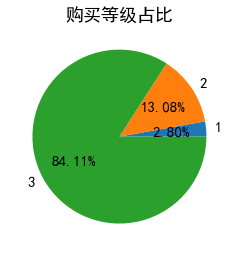

In [23]:
font = {
    'family':"SimHei",
    "size":"15"
}
plt.rc("font",**font)
plt.pie(user_info.groupby("shopping_level").count()["age_level"]
       ,labels=[1,2,3]
       ,autopct="%.2f%%")
plt.title("购买等级占比")
plt.show()

### 热力图

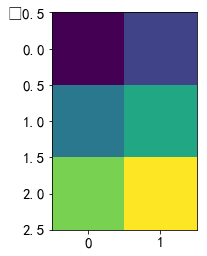

In [24]:
x = [[1,2]
     ,[3,4]
     ,[5,6]]
plt.imshow(x)

In [25]:
# 构建年龄和购物等级之间的关系
# age_level  shopping_level 
"""
1
2
3
  1   2  3  4  5  6

"""

'\n1\n2\n3\n  1   2  3  4  5  6\n\n'

In [27]:
# 先单个计算 age_level的基本情况
age_level_group_data = user_info.groupby("age_level").count()
age_level_group_data

,cms_group_id,cms_segid,final_gender_code,new_user_class_level,occupation,pvalue_level,shopping_level,userid
age_level,,,,,,,,
1.0,8,8,8,2,8,1,8,8
2.0,14,14,14,10,14,8,14,14
3.0,33,33,33,28,33,12,33,33
4.0,30,30,30,20,30,12,30,30
5.0,20,20,20,18,20,10,20,20
6.0,2,2,2,2,2,2,2,2


In [28]:
age_level_group_data.index.values

array([1., 2., 3., 4., 5., 6.])

In [29]:
for i in age_level_group_data.index.values:
    user_info["age_level"]==i
    print(user_info)

     age_level  cms_group_id  cms_segid  final_gender_code  \
0          5.0           5.0        0.0                2.0   
1          2.0           8.0       55.0                1.0   
2          4.0           4.0        0.0                2.0   
3          3.0           3.0        0.0                2.0   
4          4.0           4.0        0.0                2.0   
..         ...           ...        ...                ...   
102        5.0           5.0        0.0                2.0   
103        4.0          10.0        0.0                1.0   
104        6.0          12.0       96.0                1.0   
105        4.0           4.0        0.0                2.0   
106        3.0           3.0        0.0                2.0   

     new_user_class_level   occupation  pvalue_level  shopping_level  \
0                      3.0         0.0           NaN             3.0   
1                      1.0         0.0           2.0             2.0   
2                      1.0         0.0 

In [33]:
for i in age_level_group_data.index.values:
    print("age_level为{}的shopping_level的情况是".format(i))
    print(user_info[user_info["age_level"]==i].groupby("shopping_level").count()["age_level"])

age_level为1.0的shopping_level的情况是
shopping_level
1.0    1
2.0    2
3.0    5
Name: age_level, dtype: int64
age_level为2.0的shopping_level的情况是
shopping_level
2.0     1
3.0    13
Name: age_level, dtype: int64
age_level为3.0的shopping_level的情况是
shopping_level
1.0     2
2.0     1
3.0    30
Name: age_level, dtype: int64
age_level为4.0的shopping_level的情况是
shopping_level
2.0     6
3.0    24
Name: age_level, dtype: int64
age_level为5.0的shopping_level的情况是
shopping_level
2.0     4
3.0    16
Name: age_level, dtype: int64
age_level为6.0的shopping_level的情况是
shopping_level
3.0    2
Name: age_level, dtype: int64


In [41]:
# 创建一个空的列表
x = np.empty((3,0))
x

array([], shape=(3, 0), dtype=float64)

In [42]:
##  按照我们刚刚说过的思路，把这个空的列表进行赋值

for i in age_level_group_data.index.values:
    print("age_level为{}的shopping_level的情况是".format(i))
    result = user_info[user_info["age_level"]==i].groupby("shopping_level").count()["age_level"]
    print(result)
    
    # 要解决的是把空的行补成0
    if len(result) != 3:
        print("长度不是3，判断具体哪个值是缺失的，然后补0")
        # 先声明一个含有3个索引的数组，思路是，下边迭代出来的元素依次删除，剩下的就是没有的
        arr = [1,2,3]
        for i in result.index.values.astype(int):
            arr.remove(i)
        
        # 遍历arr中剩余的元素，并且把result中没有的位置赋值为0
        for a in arr:
            result[float(a)]=0
        
        result = result.sort_index()
        print(result)
    x = np.column_stack((x,result))
    
    
print(x)

age_level为1.0的shopping_level的情况是
shopping_level
1.0    1
2.0    2
3.0    5
Name: age_level, dtype: int64
age_level为2.0的shopping_level的情况是
shopping_level
2.0     1
3.0    13
Name: age_level, dtype: int64
长度不是3，判断具体哪个值是缺失的，然后补0
shopping_level
1.0     0
2.0     1
3.0    13
Name: age_level, dtype: int64
age_level为3.0的shopping_level的情况是
shopping_level
1.0     2
2.0     1
3.0    30
Name: age_level, dtype: int64
age_level为4.0的shopping_level的情况是
shopping_level
2.0     6
3.0    24
Name: age_level, dtype: int64
长度不是3，判断具体哪个值是缺失的，然后补0
shopping_level
1.0     0
2.0     6
3.0    24
Name: age_level, dtype: int64
age_level为5.0的shopping_level的情况是
shopping_level
2.0     4
3.0    16
Name: age_level, dtype: int64
长度不是3，判断具体哪个值是缺失的，然后补0
shopping_level
1.0     0
2.0     4
3.0    16
Name: age_level, dtype: int64
age_level为6.0的shopping_level的情况是
shopping_level
3.0    2
Name: age_level, dtype: int64
长度不是3，判断具体哪个值是缺失的，然后补0
shopping_level
1.0    0
2.0    0
3.0    2
Name: age_level, dtype: int64
[[ 1.  0.  2.  0.

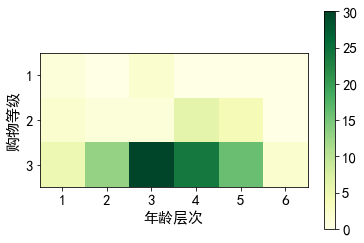

In [49]:
plt.imshow(x,
          cmap="YlGn")


plt.xlabel("年龄层次")
plt.ylabel("购物等级")

#

plt.xticks(np.arange(6), np.arange(1,user_info["age_level"].unique().astype(int).max() + 1))
plt.yticks(np.arange(3), np.arange(1,user_info["shopping_level"].unique().astype(int).max() + 1))
plt.colorbar()
plt.show()

In [50]:
user_info["age_level"]

0      5.0
1      2.0
2      4.0
3      3.0
4      4.0
      ... 
102    5.0
103    4.0
104    6.0
105    4.0
106    3.0
Name: age_level, Length: 107, dtype: float64

In [52]:
user_info["age_level"].unique()

array([5., 2., 4., 3., 1., 6.])

In [53]:
user_info["age_level"].unique().astype(int)

array([5, 2, 4, 3, 1, 6])

In [54]:
user_info["age_level"].unique().astype(int).max()

6